In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

In [24]:
spaceinvaders_history = pickle.load(open('data/space_invaders_T55000_strtTrain200_steps10000.p', 'rb'))

In [25]:
spaceinvaders_reward = spaceinvaders_history['reward']
spaceinvaders_avg_reward = spaceinvaders_history['avg_reward']
spaceinvaders_avg_Q = spaceinvaders_history['avg_Q']

Text(0, 0.5, 'Reward')

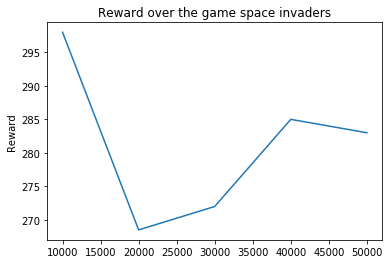

In [27]:
plt.plot([10000, 20000, 30000, 40000, 50000], spaceinvaders_avg_reward)
plt.title('Reward over the game space invaders')
plt.ylabel('Reward')